In [2]:
#1
!pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [6]:
#2
import pandas as pd

wine_data = pd.read_csv(r"C:\Users\yuvra\Downloads\wine\wine.csv")
print("Dataset dimensions:", wine_data.shape)


Dataset dimensions: (1599, 12)


In [7]:
#3
# Check for null values
print("Null values:\n", wine_data.isnull().sum())

# Identify categorical variables (if any)
categorical_vars = wine_data.select_dtypes(include=['object']).columns
print("Categorical variables:", categorical_vars)

# One-hot encode categorical variables
wine_data = pd.get_dummies(wine_data, columns=categorical_vars)

Null values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Categorical variables: Index(['quality'], dtype='object')


In [13]:
#4
X = wine_data.drop('pH', axis=1)
y = wine_data['pH']

In [14]:
#5
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
#6
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [17]:
#7
# Define a Sequential model
model = keras.Sequential()

# Input layer (you need to specify the input shape, which depends on your feature dimensions)
model.add(keras.layers.Input(shape=(1599, 12)))  # Replace 'input_shape' with the actual input shape

# First hidden layer
model.add(keras.layers.Dense(units=64, activation='relu'))

# Second hidden layer
model.add(keras.layers.Dense(units=32, activation='relu'))

# Output layer (1 unit for binary classification with a sigmoid activation function)
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [18]:
#8
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Add hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

In [19]:
#9
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
#10
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
#12
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
35/35 [==============================] - 6s 14ms/step - loss: -1.6496 - accuracy: 0.0000e+00 - val_loss: -4.8635 - val_accuracy: 0.0000e+00
Epoch 2/10
35/35 [==============================] - 0s 4ms/step - loss: -9.4988 - accuracy: 0.0000e+00 - val_loss: -15.7062 - val_accuracy: 0.0000e+00
Epoch 3/10
35/35 [==============================] - 0s 4ms/step - loss: -25.4781 - accuracy: 0.0000e+00 - val_loss: -38.1413 - val_accuracy: 0.0000e+00
Epoch 4/10
35/35 [==============================] - 0s 4ms/step - loss: -57.7066 - accuracy: 0.0000e+00 - val_loss: -81.5849 - val_accuracy: 0.0000e+00
Epoch 5/10
35/35 [==============================] - 0s 4ms/step - loss: -117.2584 - accuracy: 0.0000e+00 - val_loss: -158.2331 - val_accuracy: 0.0000e+00
Epoch 6/10
35/35 [==============================] - 0s 4ms/step - loss: -217.0796 - accuracy: 0.0000e+00 - val_loss: -281.4710 - val_accuracy: 0.0000e+00
Epoch 7/10
35/35 [==============================] - 0s 4ms/step - loss: -371.8679 - ac

In [23]:
#13
model.get_weights()

[array([[-8.29189360e-01,  6.66898489e-01,  1.93450972e-01,
          6.34396255e-01,  4.85221714e-01, -3.59676152e-01,
          3.10014039e-01,  2.01584492e-02,  2.74301499e-01,
          5.65835178e-01, -2.86332488e-01, -5.79499543e-01,
          2.40231797e-01, -4.83003139e-01,  4.94238555e-01,
          4.46609139e-01, -4.44740295e-01, -8.18267703e-01,
          5.57952285e-01,  5.95351815e-01, -6.64438903e-01,
         -4.34754163e-01,  6.36724949e-01, -6.45193815e-01,
         -2.97382891e-01,  6.43425643e-01, -2.25525916e-01,
         -3.74492943e-01,  5.84575415e-01, -6.13061368e-01,
         -7.57499278e-01,  1.90005839e-01, -6.72789633e-01,
         -8.05939317e-01, -4.37629968e-01,  1.44231200e-01,
         -6.29601121e-01,  3.86268646e-01, -2.41946913e-02,
         -5.65645278e-01, -5.59866965e-01, -7.95099139e-01,
          5.02481401e-01, -6.04646623e-01,  4.86483812e-01,
          1.68267727e-01,  8.61492082e-02,  6.71514809e-01,
         -8.67536604e-01,  3.96944642e-0

In [24]:
#14
history_df = pd.DataFrame(history.history)

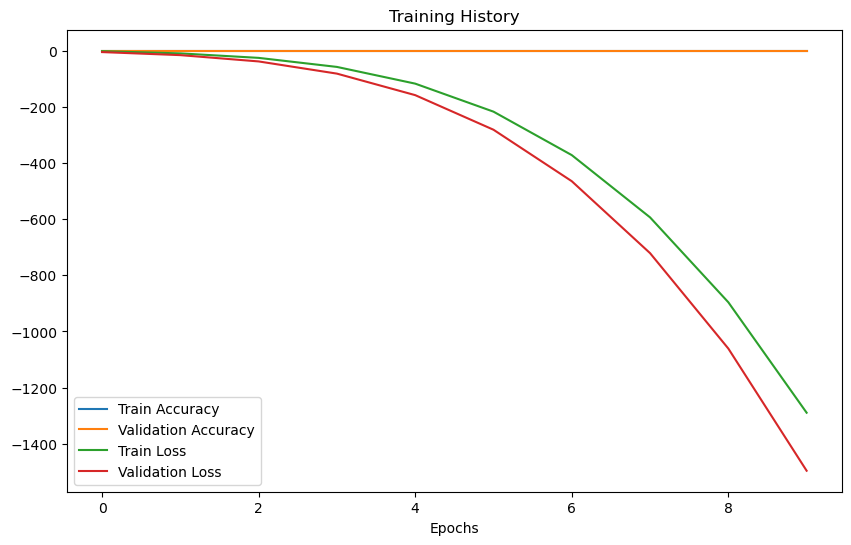

In [25]:
#15
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.title('Training History')
plt.show()

In [26]:
#16
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

8/8 [==============================] - 0s 4ms/step - loss: -1546.3651 - accuracy: 0.0000e+00
Test Loss: -1546.3651
Test Accuracy: 0.00%
